## 라이브러리 설치

In [1]:
# pip install mglearn

In [2]:
import mglearn
from sklearn.model_selection import train_test_split

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

## matplotlib 사용시 한국어 나오게 하는 코드
!apt -qq -y install fonts-nanum

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

font = fm.FontProperties(fname=fontpath, size=9)

fm._rebuild()

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


## 본문 내용

### 선형회귀
예측과 훈련 세트에 있는 y사이의 평균제곱오차(mse)를 최소화 하는 파라미터 w와 b를 찾는다.  
매개변수가 없는 것이 장점이나, 복집도를 제어할 방법 또한 없다.

In [4]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42)

lr = LinearRegression().fit(X_train,y_train)

In [5]:
# 가중치와 계수 - 사용자가 지정한 매개변수와 구분하기 위해서 훈련에서 유도된 속성은 끝에 밑줄을 붙인다.
print(f'lr.coef_ : {lr.coef_}')
print(f'lr.intercept_ : {lr.intercept_}')

lr.coef_ : [0.39390555]
lr.intercept_ : -0.031804343026759746


In [6]:
# 트레이닝, 테스트 세트 성능 체크
print(f'훈련세트 점수 : {lr.score(X_train,y_train)}')
print(f'테스트세트 점수 : {lr.score(X_test,y_test)}')

훈련세트 점수 : 0.6700890315075756
테스트세트 점수 : 0.65933685968637


훈련세트와 테스트 세트의 점수가 비슷하므로, 과소적합인 상태이다.  
1차원 데이터셋에서는 모델이 단순 혹은 제한적이므로 과적합을 걱정할 필요가 없으나  
특성이 많은 고차원데이터셋에서는 과적합의 가능성이 높다. 

In [7]:
# 보스턴 데이터셋
X, y = mglearn.datasets.load_extended_boston()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0)

lr = LinearRegression().fit(X_train,y_train)

In [8]:
# 트레이닝, 테스트 세트 성능 체크
print(f'훈련세트 점수 : {lr.score(X_train,y_train)}')
print(f'테스트세트 점수 : {lr.score(X_test,y_test)}')

훈련세트 점수 : 0.9520519609032727
테스트세트 점수 : 0.607472195966557


-> 훈련세트와 테스트 세트에서 점수 값이 차이가 많이 나기 때문에 복잡도를 제어할 수 있는 모델을 사용해야 함.

### 리지회귀
가중치의 모든 원소가 0에 가깝게 되도록 만든다.  
즉, 모든 특성이 출력에 주는 영향을 최소한으로 만든다는 것이며 기울기를 작게만드는 것이라고 할 수 있다.  
이를 규제, 과대 적합이 되지 않도록 모델을 강제로 제한한다는 것이라고 말하며 리지회귀에서의 규제는 **L2**회귀라고 한다. 

In [9]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)

# 트레이닝, 테스트 세트 성능 체크
print(f'훈련세트 점수 : {ridge.score(X_train,y_train)}')
print(f'테스트세트 점수 : {ridge.score(X_test,y_test)}')

훈련세트 점수 : 0.8857966585170941
테스트세트 점수 : 0.7527683481744751


**alpha** 값을 조절하여 훈련세트의 성능 대비 모델을 얼마나 단순화할지 정할 수 있다.  
디폴트 값은 alpha = 1.0이며, alpha값이 높아지면 계수를 0에 가깝게 만들어 일반화에 도움이 되도록 할 수도 있다. 

In [10]:
# 알파값을 크게 한 경우 
ridge10 = Ridge(alpha=10).fit(X_train,y_train)

# 트레이닝, 테스트 세트 성능 체크
print(f'훈련세트 점수 : {ridge10.score(X_train,y_train)}')
print(f'테스트세트 점수 : {ridge10.score(X_test,y_test)}')

훈련세트 점수 : 0.7882787115369614
테스트세트 점수 : 0.6359411489177309


In [11]:
# 알파값을 작게 한 경우 - lr에 비슷한 결과
ridge01 = Ridge(alpha=0.1).fit(X_train,y_train)

# 트레이닝, 테스트 세트 성능 체크
print(f'훈련세트 점수 : {ridge01.score(X_train,y_train)}')
print(f'테스트세트 점수 : {ridge01.score(X_test,y_test)}')

훈련세트 점수 : 0.9282273685001992
테스트세트 점수 : 0.7722067936479818


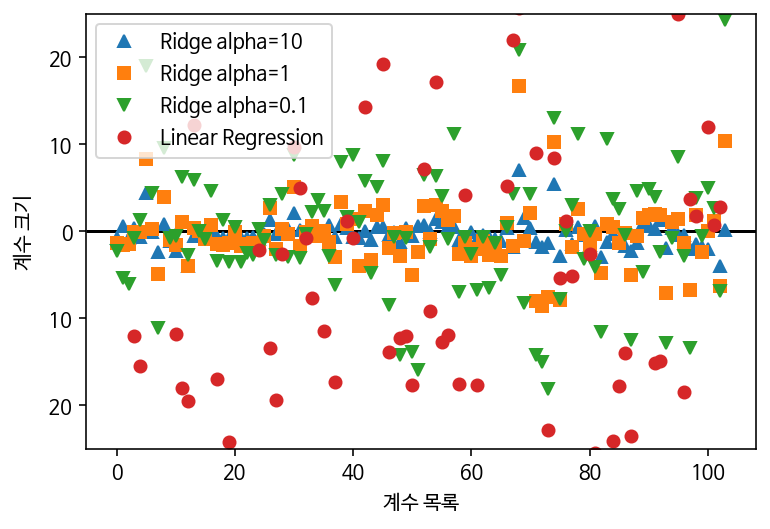

In [12]:
plt.plot(ridge10.coef_,'^',label="Ridge alpha=10")
plt.plot(ridge.coef_,'s',label="Ridge alpha=1")
plt.plot(ridge01.coef_,'v',label="Ridge alpha=0.1")

plt.plot(lr.coef_,'o',label="Linear Regression")

plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
xlims = plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.xlim(xlims)
plt.ylim(-25,25)
plt.legend()

x축은 coef_의 원소를 위치대로 나열한 것,  
x=0은 첫번째 특성에 관련한 계수, x=1은 두번째 특성에 관련한 계수  
y축은 각 계수의 수치를 나타내는 것으로, 알파가 클 때와 작을 때가 다른 것을 볼 수 있다. 

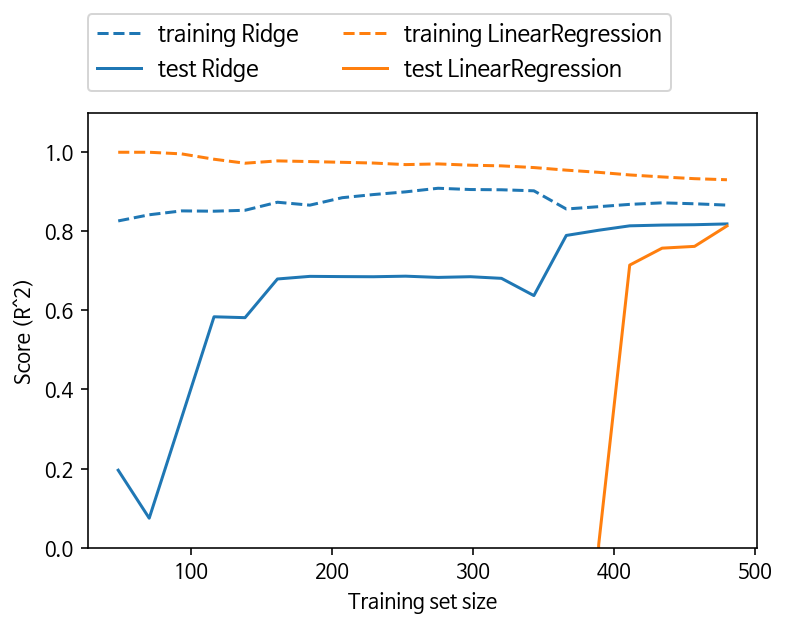

In [13]:
# 알파는 고정, 훈련데이터의 크기 변화로 규제의 효과 이해 
mglearn.plots.plot_ridge_n_samples()

### 라쏘
계수를 0으로 만들려고 하는 것은 릿지와 같으나 라쏘는 0에 가깝게가 아닌 정말 0으로 만들기도 한다.  
특성 선택이 자동으로 이루어지는 것이며, **L1규제**라고 함. 

In [14]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train,y_train)


print(f'훈련세트 점수 : {lasso.score(X_train,y_train)}')
print(f'테스트세트 점수 : {lasso.score(X_test,y_test)}')
print(f'사용한 특성의 개수 : {np.sum(lasso.coef_ != 0)}')

훈련세트 점수 : 0.29323768991114607
테스트세트 점수 : 0.20937503255272294
사용한 특성의 개수 : 4


라쏘도 릿지와 같이 alpha매개변수를 지원한다.  
디폴트 값은 1이며, 과소적합을 줄이기 위해서는 alpha값을 줄이면 되는데, 이를 위해 max_iter를 늘려야한다.  
alpha값을 너무 낮추는 경우, 규제의 효과가 없어져 과대적합이 되어 LR과 비슷해지는 결과를 가져온다.

In [15]:
lasso001 = Lasso(alpha=0.01, max_iter=10000).fit(X_train,y_train)

print(f'훈련세트 점수 : {lasso001.score(X_train,y_train)}')
print(f'테스트세트 점수 : {lasso001.score(X_test,y_test)}')
print(f'사용한 특성의 개수 : {np.sum(lasso001.coef_ != 0)}')

훈련세트 점수 : 0.8962226511086497
테스트세트 점수 : 0.7656571174549982
사용한 특성의 개수 : 33


In [16]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train,y_train)

print(f'훈련세트 점수 : {lasso00001.score(X_train,y_train)}')
print(f'테스트세트 점수 : {lasso00001.score(X_test,y_test)}')
print(f'사용한 특성의 개수 : {np.sum(lasso00001.coef_ != 0)}')

훈련세트 점수 : 0.9507158754515463
테스트세트 점수 : 0.6437467421272821
사용한 특성의 개수 : 96


Text(0, 0.5, '계수 크기')

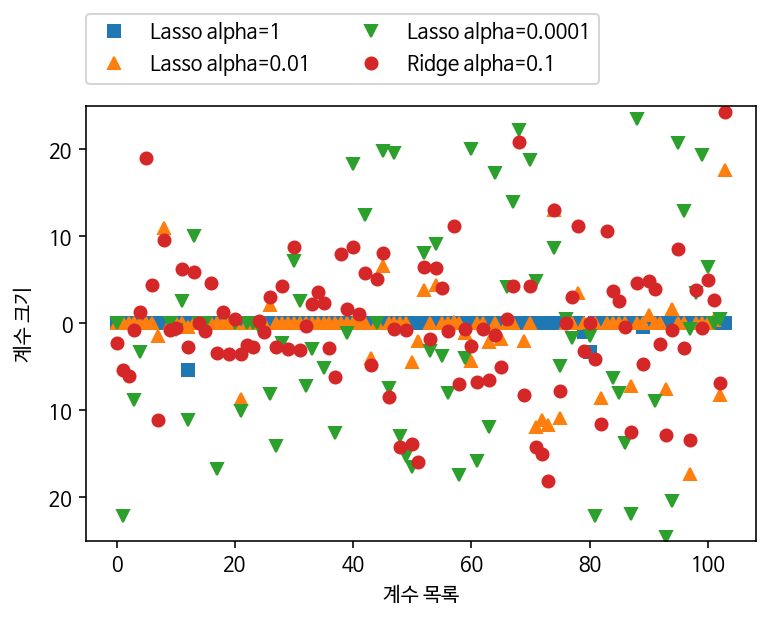

In [21]:
plt.plot(lasso.coef_,'s',label="Lasso alpha=1")
plt.plot(lasso001.coef_,'^',label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_,'v',label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_,'o',label="Ridge alpha=0.1")

plt.legend(ncol=2,loc=(0,1.05))
plt.ylim(-25,25)

plt.xlabel("계수 목록")
plt.ylabel("계수 크기")